<a href="https://colab.research.google.com/github/SohamBera16/ML-Zoomcamp/blob/main/MLZoomcamp_HW_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 07:55:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-19 07:55:07 (19.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [12]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("housing.csv")

print(data.head(n=7))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4   

In [5]:
print('number of records in the dataset',len(data.index))

number of records in the dataset 20640


In [8]:
print('name of the columns:',data.columns)
print('number of columns in the dataset:',len(data.columns))

name of the columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
number of columns in the dataset: 10


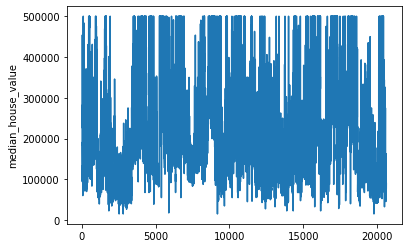

In [13]:
plt.plot(data['median_house_value'])
plt.ylabel('median_house_value')
plt.show()

In [15]:
house_data = data.drop(labels=['ocean_proximity'],axis=1)
print(house_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


In [20]:
house_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer 1: The feature with missing value is total_bedrooms (with 207 missing values.)

In [23]:
house_data['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

Answer 2: The median (50% percentile) for variable 'population' is 1166. 

In [29]:
y = house_data['median_house_value']
print(y.head())

X = house_data.drop(labels=['median_house_value'],axis=1)
print(X.head())

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  


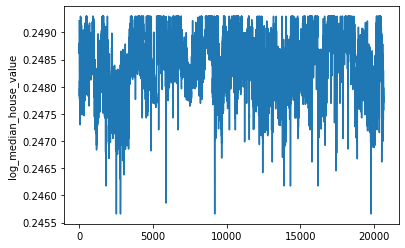

In [39]:
# log-transformation of the target label to reduce skewness 
y = np.log1p(y)      #log (1 plus variable)
plt.plot(y)
plt.ylabel('log_median_house_value')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle=True) 

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [45]:
X_train_zerofill = X_train.fillna(value = 0)
X_train_meanfill = X_train.fillna(value = X_train['total_bedrooms'].mean())

In [46]:
from sklearn.metrics import mean_squared_error

In [52]:
reg_zerofill = LinearRegression().fit(X_train_zerofill, y_train)
y_pred_zerofill = reg_zerofill.predict(X_val)

rmse_zerofill = mean_squared_error(y_val, y_pred_zerofill, squared=False)
#rmse_zerofill = round(rmse_zerofill, 2)
print('rmse with zerofill',rmse_zerofill)

rmse with zerofill 0.00032329556588184076


In [53]:
reg_meanfill = LinearRegression().fit(X_train_meanfill, y_train)
y_pred_meanfill = reg_meanfill.predict(X_val)

rmse_meanfill = mean_squared_error(y_val, y_pred_meanfill, squared=False)
#rmse_meanfill = round(rmse_meanfill, 2)
print('rmse with meanfill',rmse_meanfill)

rmse with meanfill 0.00032329556588184076


Answer 3: Both the options of filling missing values i.e. filling with zero as well filling with mean value are equally good. 

In [60]:
def train_linear_regression_reg(X, y, r=0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [61]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [66]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = []

for r in r_values:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
  X_train = X_train.fillna(value = 0)
  X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
  w0, w = train_linear_regression_reg(X_train, y_train, r)
  y_pred = w0 + X_val.dot(w)
  rmse_zerofill = rmse(y_pred, y_val)
  rmse_zerofill = round(rmse_zerofill,2)
  rmse_scores.append(rmse_zerofill)

#print(rmse_scores)
optimum_r = rmse_scores.index(min(rmse_scores))
print('best r value is:',r_values[optimum_r])

best r value is: 0


Answer 4: The smallest r value is 0. 

In [67]:
# testing the effect of different seed values 
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for s in seed: 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = s)
  X_train = X_train.fillna(value = 0)
  X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=s)
  w0, w = train_linear_regression_reg(X_train, y_train, r)
  y_pred = w0 + X_val.dot(w)
  rmse_zerofill = rmse(y_pred, y_val)
  rmse_zerofill = round(rmse_zerofill,3)
  rmse_scores.append(rmse_zerofill)

print(rmse_scores)
std = np.std(rmse_scores)
print(std)
std_dev = round(std, 3)
print(std_dev)

[0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]
4.336808689942018e-19
0.0


Answer 5: The nearest value to the answer is 0.00005.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 9)
X_train = X_train.fillna(value = 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse_zerofill = rmse(y_test, y_pred)
#rmse_zerofill = round(rmse_zerofill,3)
print('RMSE score on the test dataset is: ',rmse_zerofill)

RMSE score on the test dataset is:  0.00032114779029203855


Answer 6: The closest answer is : 0.135